In [121]:
from pathlib import Path
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt
import math


In [122]:
path = Path('../data/COVID-19_2020.csv')
data = pd.read_csv(path)


In [123]:
data.head()


,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0.0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0.0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.0,0.0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.0,0.0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.0,0.0,"Epidemic intelligence, national weekly data"


In [124]:
only_countries = ['Africa (total)', 'America (total)', 'Asia (total)',
                  'EU/EEA (total)', 'Europe (total)', 'Oceania (total)']
continents = ['Africa (total)', 'America (total)',
              'Asia (total)', 'Europe (total)', 'Oceania (total)']
data_countries = data[~data.country.isin(only_countries)]
data_continents = data[data.country.isin(continents)]


## Aufgabe 1 

Welches Land verzeichnete den stärksten Anstieg der Toten zur Vorwoche? Wie heisst das Land und in welcher Woche / Jahr war dieser starke Anstieg zu beklagen?

In [125]:
data_countries_death = data_countries[data_countries['indicator'] == 'deaths']
data_continents_death = data_continents[data_continents['indicator'] == 'deaths']
data_countries_death.to_csv('../data/COVID-19_2020_deaths.csv')


In [126]:
list_weekly_count = list(data_countries_death.weekly_count)
anstieg = [0]
for i in range(1, len(list_weekly_count)):
    anstieg.append(list_weekly_count[i]-list_weekly_count[i-1])

data_countries_death['Anstieg'] = anstieg

data_countries_death.to_csv('../data/COVID-19_2020_deaths_with_Anstieg.csv')


C:\Users\voelk\AppData\Local\Temp/ipykernel_24796/4192554153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_countries_death['Anstieg'] = anstieg


In [127]:
data_countries_death_sorted = data_countries_death.sort_values(
    by=['Anstieg'], ascending=False)


In [128]:
height_a1 = list(data_countries_death_sorted.Anstieg.head())
countries = list(data_countries_death_sorted.country.head())
weeks = list(data_countries_death_sorted.year_week.head())
x_fig1 = []


for i in range(len(countries)):
    if countries[i] == 'United States Of America':
        countries[i] = 'USA'
    x_fig1.append(f'{countries[i]} ({weeks[i]})')

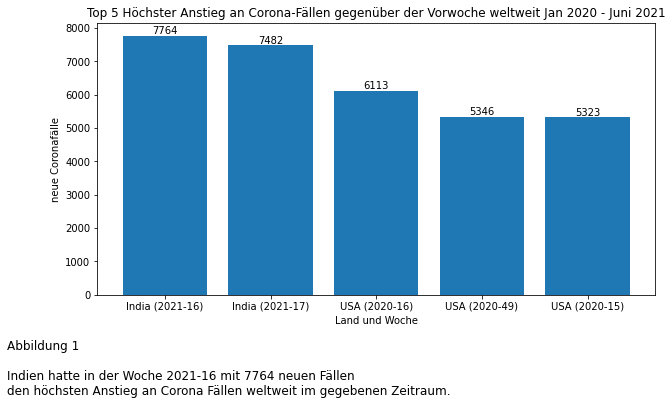

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=x_fig1, height=height_a1)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Top 5 Höchster Anstieg an Corona-Fällen gegenüber der Vorwoche weltweit Jan 2020 - Juni 2021')
plt.ylabel('neue Coronafälle')
plt.xlabel('Land und Woche')
plt.suptitle('Abbildung 1\n\nIndien hatte in der Woche 2021-16 mit 7764 neuen Fällen \nden höchsten Anstieg an Corona Fällen weltweit im gegebenen Zeitraum.',
             x=0, y=0, ha='left')

plt.savefig('../result/Aufgabe1.svg', bbox_inches = 'tight')


#### Antwort:
Indien mit 7764 neuen Fällen in Woche 16

## Aufgabe 2:
Stellen sie für jeden Kontinent (als Durchschnitt aus den Ländern des Kontinents) die 14-Tages-Rate grafisch für jede Woche gegenüber. Welcher Kontinent war wie häufig der 14-Tagesraten-“Sieger“, im Sinne von: hatte am häufigsten die höchste 14-Tages-Rate.

In [130]:
data_africa = data[data.country.isin([continents[0]])]
data_africa.to_csv('../data/COVID-19_2020_africa.csv')
data_africa = data_africa.head(75)
data_america = data[data.country.isin([continents[1]])]
data_america.to_csv('../data/COVID-19_2020_america.csv')
data_america = data_america.head(75)
data_asia = data[data.country.isin([continents[2]])]
data_asia = data_asia.head(75)
data_europe = data[data.country.isin([continents[3]])]
data_europe = data_europe.head(75)
data_oceania = data[data.country.isin([continents[4]])]
data_oceania = data_africa.head(75)


In [131]:
data_africa.to_csv('../data/COVID-19_2020_africa.csv')


#### Vergleich

In [132]:
weeks_numerated = list(range(1, len(data_africa.year_week)+1))
weeks = list(map(lambda x: x[5:], list(data_africa.year_week)))
weeks = list(data_africa.year_week)
# weeks[0] = '01-20'
# weeks[53] = '01-22'


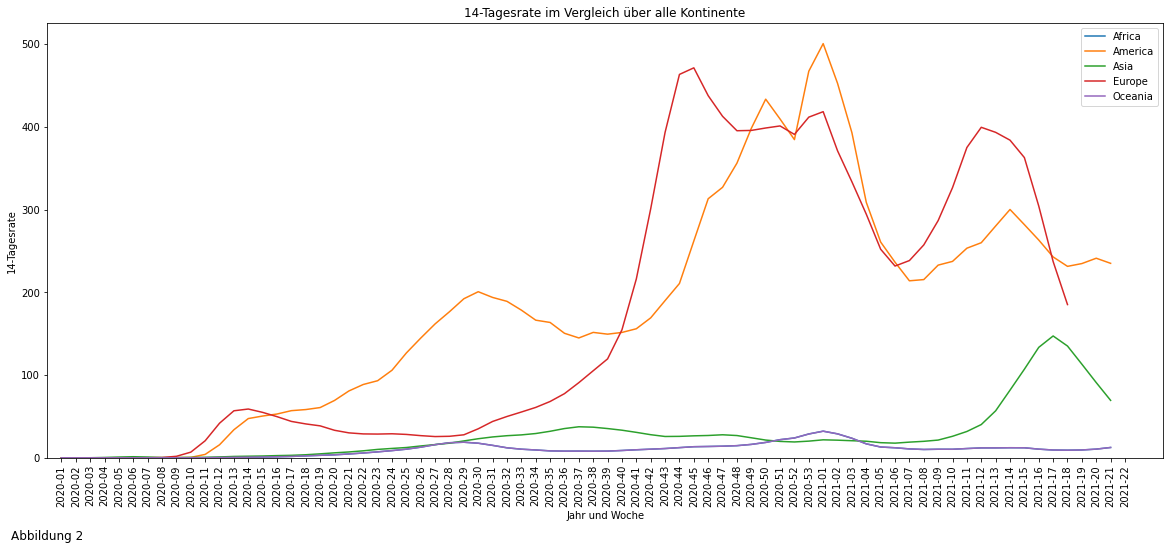

In [133]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(list(data_africa.rate_14_day), label='Africa')
ax.plot(list(data_america.rate_14_day), label='America')
ax.plot(list(data_asia.rate_14_day), label='Asia')
ax.plot(list(data_europe.rate_14_day), label='Europe')
ax.plot(list(data_oceania.rate_14_day), label='Oceania')

ax.set_xticks(weeks_numerated)
ax.set_xticklabels(weeks)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xticks(rotation=90)

plt.title('14-Tagesrate im Vergleich über alle Kontinente')
plt.ylabel('14-Tagesrate')
plt.xlabel('Jahr und Woche')
plt.legend()
plt.suptitle('Abbildung 2',
             x=0.1, y=0, ha='left')
plt.savefig('../result/Aufgabe2.svg', bbox_inches = 'tight')


### Höchste Rate

In [134]:
data.head()


,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0.0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0.0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.0,0.0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.0,0.0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.0,0.0,"Epidemic intelligence, national weekly data"


In [135]:
data_continents = data[data.country.isin(continents)]
data_continents.to_csv('../data/COVID-19_2020_continents.csv')
data_continents_week_grouped = data_continents.groupby('year_week')


In [151]:
sieger = []

for i in data_continents_week_grouped.year_week.unique():
    # print(i[0])
    sorted = data_continents_week_grouped.get_group(
        i[0]).sort_values(by='rate_14_day', ascending=False)
    sieg = sorted.iloc[0]
    if not math.isnan(float(sieg.rate_14_day)):
    	sieger.append(sieg.country)
    # print()
    # print(sieg.country, type(float(sieg.rate_14_day)))

anzahl_siege = {}

for continent in continents:
    anzahl_siege[continent] = 0
    for i in sieger:
        if continent == i:
            anzahl_siege[continent] += 1


print(anzahl_siege.values())

# print(data_continents_week_grouped.get_group('2020-02'))


dict_values([0, 38, 8, 28, 0])


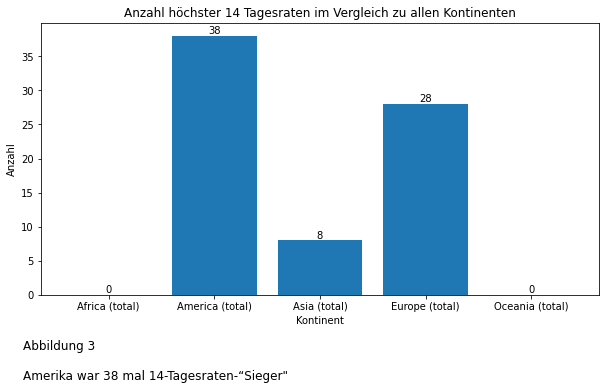

In [152]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=continents, height=anzahl_siege.values())
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Anzahl höchster 14 Tagesraten im Vergleich zu allen Kontinenten')
plt.ylabel('Anzahl')
plt.xlabel('Kontinent')
plt.suptitle('Abbildung 3\n\nAmerika war 38 mal 14-Tagesraten-“Sieger"',
             x=0.1, y=0, ha='left')
plt.savefig('../result/Aufgabe2_Sieger.svg', bbox_inches = 'tight')


#### Antwort: 
Amerika war 38 mal 14-Tagesraten-“Sieger"

## Aufgabe 3
Stellen Sie für jeden Kontinent den Anteil der Toten an der Gesamtbevölkerung des Kontinents (summiert über alle Wochen des Erhebungszeitraums) visuell gegenüber, so dass sichtbar wird, welcher Kontinent am stärksten betroffen war. Geben Sie hierbei auch ein Schwankungsmaß an, so dass sichtbar wird, ob alle Länder des Kontinents gleich stark betroffen waren.

In [143]:
countries_grouped = data_countries_death.groupby(['continent', 'country'])
continents_groubed = data_continents_death.groupby('continent')
continents_code = list(data.continent.unique())
countries_code = list(data_countries.country.unique())


In [139]:

mortality_rate_multiplier = 100000
continents_mortality_rate = {}  # continent: (mortality_rate, std)

for continent in continents_code:

    countries_mortality_rate = []

    for country in countries_code:
        try:
            group = countries_grouped.get_group((continent, country))
            group_sorted = group.sort_values('year_week', ascending=False)
            head = group_sorted.head(1)
            mortality_rate = float(head.cumulative_count) / \
                float(head.population) * mortality_rate_multiplier
            countries_mortality_rate.append(mortality_rate)
        except:
            "Group doesn't exist"

    group = continents_groubed.get_group(continent)
    group_sorted = group.sort_values('year_week', ascending=False)
    head = group_sorted.head(1)
    mortality_rate = round(float(head.cumulative_count) /
                           float(head.population) * mortality_rate_multiplier, 2)

    mortality_rate_std = round(np.std(countries_mortality_rate), 2)
    continents_mortality_rate[continent] = (mortality_rate, mortality_rate_std)

print(continents_mortality_rate)


{'Asia': (14.5, 29.2), 'Africa': (9.88, 22.16), 'Europe': (134.29, 81.98), 'America': (177.05, 92.66), 'Oceania': (3.31, 27.75)}


In [140]:
x_fig4 = []
err = []
height_fig4 = []
for k, v in continents_mortality_rate.items():
    # print(v)
    # print(k)
    x_fig4.append(f'{k}\nRate: {v[0]}\nStd: {v[1]}')
    err.append(v[1])
    height_fig4.append(v[0])

error_fig4 = [np.zeros(len(err)), err]


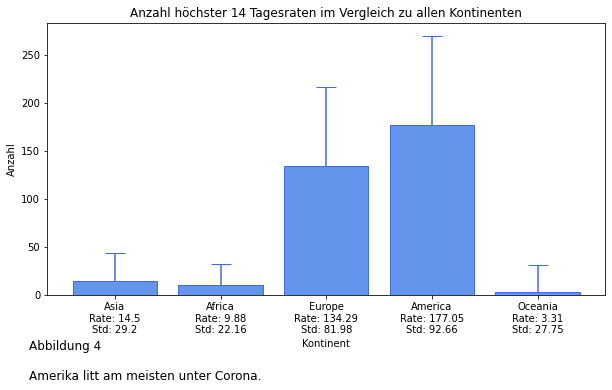

In [142]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=x_fig4, height=height_fig4, yerr=error_fig4, capsize=10,
       color='cornflowerblue', edgecolor="royalblue", ecolor='royalblue')

plt.title('Anzahl höchster 14 Tagesraten im Vergleich zu allen Kontinenten')
plt.ylabel('Anzahl')
plt.xlabel('Kontinent')
plt.suptitle('Abbildung 4\n\nAmerika litt am meisten unter Corona.',
             x=0.1, y=0, ha='left')
plt.savefig('../result/Aufgabe3.svg', bbox_inches = 'tight')
